## Imports

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [2]:
logging.basicConfig(level=logging.ERROR, force=True)

## Preprocessing

In [3]:
REQUIRED_NUM_POINTS = 75
fall_results = []
fall_data_id = 1
for top_dir in ["../data/raw/rishabh_fall/*.csv", "../data/raw/felicia_fall/*.csv"]:
    for file_path in glob.glob(top_dir):
        curr_fall_df = pd.read_csv(file_path, header=1, delimiter="\t")
        curr_fall_df = curr_fall_df[["x", "y", "z"]].copy()
        logging.info(file_path, len(curr_fall_df))
        if curr_fall_df.shape[0] > REQUIRED_NUM_POINTS:
            curr_fall_df = curr_fall_df.iloc[:75]
        else:
            current_available_rows = curr_fall_df.shape[0]
            # Repeat values from last row till we reach REQUIRED_NUM_POINTS
            while current_available_rows < REQUIRED_NUM_POINTS:
                curr_fall_df.loc[current_available_rows] = curr_fall_df.iloc[
                    curr_fall_df.shape[0] - 1
                ]
                current_available_rows += 1

        curr_fall_df["data_id"] = fall_data_id
        curr_fall_df.set_index(["data_id"], inplace=True)
        fall_results.append(curr_fall_df)
        fall_data_id += 1

In [4]:
print(f"Collected {fall_data_id - 1} fall data points")
combined_fall_df = pd.concat(fall_results)
combined_fall_df["label"] = 1
print(combined_fall_df.shape)
combined_fall_df.tail()

Collected 99 fall data points
(7425, 4)


,x,y,z,label
data_id,,,,
99,-504.0,-364.0,-856.0,1
99,-512.0,-364.0,-860.0,1
99,-504.0,-364.0,-868.0,1
99,-500.0,-360.0,-848.0,1
99,-508.0,-360.0,-860.0,1


In [5]:
combined_fall_df.describe()

,x,y,z,label
count,7414.000000,7423.000000,7407.000000,7425.0
mean,-302.850823,534.517042,-384.340759,1.0
std,433.137562,769.527591,663.689227,0.0
min,-2040.000000,-2040.000000,-2040.000000,1.0
25%,-468.000000,-188.000000,-876.000000,1.0
50%,-304.000000,904.000000,-256.000000,1.0
75%,-84.000000,1036.000000,-4.000000,1.0
max,2040.000000,2040.000000,2040.000000,1.0


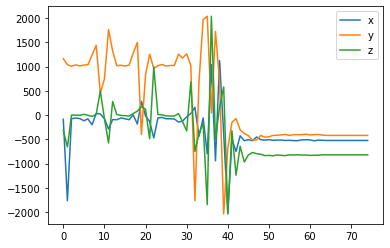

In [6]:
# Rerun this cell to check pattern for different data point
sample_point_id = np.random.randint(1, fall_data_id)
for col_name in ["x", "y", "z"]:
    sns.lineplot(
        x=np.arange(75),
        y=combined_fall_df.loc[sample_point_id][col_name].values,
        legend=True,
    )
plt.legend(["x", "y", "z"])

<AxesSubplot:>

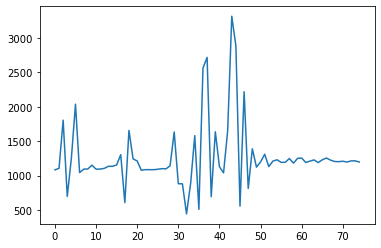

In [32]:
# Rerun this cell to check pattern for different data point
sample_point_id = np.random.randint(1, fall_data_id)
sns.lineplot(
    x=np.arange(75),
    y=combined_fall_df.loc[sample_point_id].apply(lambda r: ((r.x**2) + (r.y**2) + (r.x**2))**0.5, axis=1).values
)

In [7]:
walk_results = []
walk_data_id = fall_data_id

for file_path in glob.glob("../data/raw/rishabh_walk/*.csv"):
    curr_walk_df = pd.read_csv(file_path, header=1, delimiter="\t")
    curr_walk_df = curr_walk_df[["x", "y", "z"]].copy()
    logging.info(file_path, len(curr_walk_df))
    if curr_walk_df.shape[0] > REQUIRED_NUM_POINTS:
        for start_idx in range(0, curr_walk_df.shape[0], REQUIRED_NUM_POINTS):
            if start_idx + REQUIRED_NUM_POINTS > curr_walk_df.shape[0]:
                break
            curr_data_point = curr_walk_df.iloc[
                start_idx : start_idx + REQUIRED_NUM_POINTS
            ].copy()
            curr_data_point["data_id"] = walk_data_id
            curr_data_point.set_index(["data_id"], inplace=True)
            walk_results.append(curr_data_point)
            walk_data_id += 1
    else:
        raise ValueError("Something looks off")

In [8]:
pd.concat(walk_results)
print(f"Collected {walk_data_id - fall_data_id} walk data points")
combined_walk_df = pd.concat(walk_results)
combined_walk_df["label"] = 0
print(combined_walk_df.shape)
combined_walk_df.tail()

Collected 95 walk data points
(7125, 4)


,x,y,z,label
data_id,,,,
194,-96.0,1004.0,-248,0
194,-96.0,1004.0,-44,0
194,-96.0,1004.0,-44,0
194,-100.0,1004.0,-44,0
194,-72.0,1004.0,-44,0


In [9]:
combined_walk_df.describe()

,x,y,z,label
count,7125.000000,7125.000000,7125.000000,7125.0
mean,-111.632842,1018.585825,-87.097825,0.0
std,100.528954,165.255071,155.613066,0.0
min,-2040.000000,-2040.000000,-2040.000000,0.0
25%,-136.000000,1008.000000,-148.000000,0.0
50%,-96.000000,1024.000000,-28.000000,0.0
75%,-80.000000,1064.000000,-12.000000,0.0
max,2040.000000,2040.000000,1908.000000,0.0


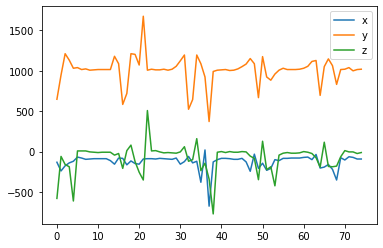

In [10]:
# Rerun this cell to check pattern for different data point
sample_point_id = np.random.randint(fall_data_id, walk_data_id)
for col_name in ["x", "y", "z"]:
    sns.lineplot(
        x=np.arange(75),
        y=combined_walk_df.loc[sample_point_id][col_name].values,
        legend=True,
    )
plt.legend(["x", "y", "z"])

<AxesSubplot:>

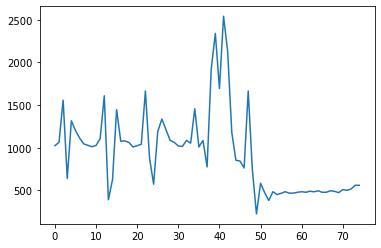

In [34]:
# Rerun this cell to check pattern for different data point
sample_point_id = np.random.randint(1, fall_data_id)
sns.lineplot(
    x=np.arange(75),
    y=combined_fall_df.loc[sample_point_id].apply(lambda r: ((r.x**2) + (r.y**2) + (r.x**2))**0.5, axis=1).values
)

In [11]:
combined_df = pd.concat([combined_fall_df, combined_walk_df])
print(combined_df.shape)
combined_df

(14550, 4)


,x,y,z,label
data_id,,,,
1,-72.0,1020.0,4.0,1
1,-64.0,1064.0,0.0,1
1,-64.0,1064.0,0.0,1
1,168.0,1172.0,8.0,1
1,-196.0,784.0,-48.0,1
...,...,...,...,...
194,-96.0,1004.0,-248.0,0
194,-96.0,1004.0,-44.0,0
194,-96.0,1004.0,-44.0,0


## Impute missing data

In [12]:
na_mask = None
for col in combined_df.columns:
    if type(na_mask) == pd.Series:
        na_mask = na_mask | combined_df[col].isna()
    else:
        na_mask = combined_df[col].isna()
combined_df[na_mask]

,x,y,z,label
data_id,,,,
1,NaN,NaN,-936.0,1
4,-480.0,-420.0,NaN,1
4,-480.0,-420.0,NaN,1
4,-480.0,-420.0,NaN,1
6,NaN,-312.0,-900.0,1
9,NaN,-116.0,-964.0,1
9,NaN,-116.0,-964.0,1
9,NaN,-116.0,-964.0,1
9,NaN,-116.0,-964.0,1


In [13]:
# The imputation 
from statsmodels.imputation.mice import MICEData

imp = MICEData(combined_df)
imp.update_all()
imputed_df = imp.data
imputed_df.index = combined_df.index


In [14]:
imputed_df[na_mask]

,x,y,z,label
data_id,,,,
1,-472.0,-172.0,-936.0,1
4,-480.0,-420.0,-848.0,1
4,-480.0,-420.0,-832.0,1
4,-480.0,-420.0,-832.0,1
6,-424.0,-312.0,-900.0,1
9,-440.0,-116.0,-964.0,1
9,-284.0,-116.0,-964.0,1
9,-464.0,-116.0,-964.0,1
9,-512.0,-116.0,-964.0,1


In [15]:
# imputed_df.to_csv("../data/processed/combined_dataset.csv")